# Approximate Dynamic Programming Exercises

- Class: EECE 571U
- Author: Bill Tubbs

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

## Background - Probability distributions with Scipy

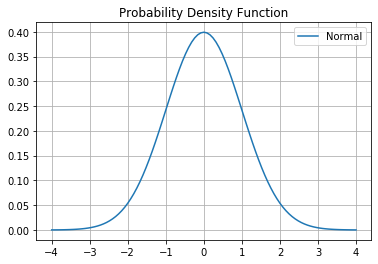

In [2]:
x = np.linspace(-4,4,101)
plt.plot(x, norm.pdf(x), label='Normal')
plt.title("Probability Density Function")
plt.legend()
plt.grid()
plt.show()

In [3]:
# Random sample (random variates)
norm.rvs()

-1.1272943435546239

In [4]:
# Cumulative probability density function
norm.cdf(0)

0.5

## Exercise 8.3

Formulate a 1-dimensional LQG problem. Approximate its solution using the procedure above. Implement your solution in Matlab. What choices do you have to make to implement your algorithm? Evaluate your approximation quality based on these choices.

In [5]:
def next_state(x, u, w):
    """Next state given x, u, w.
    """
    return x + u - w

def next_state_sample(x, u, w, size=None):
    """Sample from the distribution of next states
    given x, u, w.
    """
    return next_state(x, u, w.rvs(size=size))

def next_state_expected(x, u, w):
    """Expected value of next state given x, u.
    """
    return next_state(x, u, w.mean())

def next_state_probability(x, u, w, dx):
    """Probability of next state given x, u being in the
    range of x given by dx where dx has two items (x1, x2).
    """
    return w.cdf(dx[1] - x - u) - w.cdf(dx[0] - x - u)

def cost_function(x, u, w, c, r, cost_to_go=0):
    """Cost function in state x given u, w and cost_to_go.
    """
    return cost_to_go + x**2 + c*u - r*w

In [6]:
# Choose system parameters
c = 1
r = 0.1
w = norm()

In [7]:
# Sample the next state (random)
x = 0
u = 1
next_state_sample(x, u, w)

2.099357555442708

In [8]:
# Expected value of next state
next_state_expected(x, u, w)

1.0

In [9]:
# Exercise 8.2
# Probability of x(t+1) being in a range
# given, x(t), u(t)

dx = [-0.5, 0.5]
x = 0
u = 1
w = norm()
next_state_probability(x, u, w, dx)

0.2417303374571288

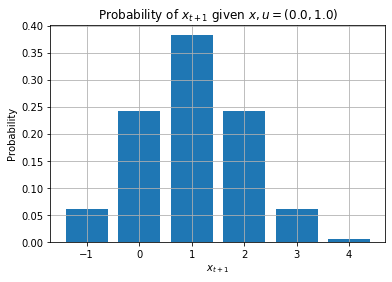

In [10]:
x_k = np.linspace(-1.5, 4.5, 7)
labels = np.linspace(-1, 4, 6)
p = [next_state_probability(x, u, w, [x_k[i], x_k[i+1]])
     for i in range(x_k.shape[0] - 1)]
plt.bar(labels, p)
plt.title("Probability of $x_{t+1}$ given $x,u=(%.1f,%.1f)$" % (x, u))
plt.xlabel("$x_{t+1}$")
plt.ylabel("Probability")
plt.grid()

In [11]:
# Simulation setup

# Number of timesteps
N = 10

In [12]:
# Define discretized state and action spaces
x_bounds = [-1, 1]
n_states = 21
states = np.linspace(x_bounds[0], x_bounds[1], n_states).round(1).tolist()
states[:5]

[-1.0, -0.9, -0.8, -0.7, -0.6]

In [13]:
action_bounds = [-1, 1]
n_actions = 21
actions = np.linspace(action_bounds[0], action_bounds[1], n_states).round(1).tolist()
actions[:5]

[-1.0, -0.9, -0.8, -0.7, -0.6]

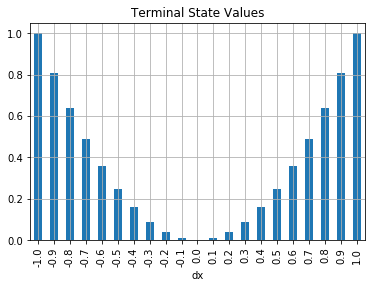

In [14]:
# Calculate terminal state values
terminal_state_values = {x: x**2 for x in states}

pd.Series(terminal_state_values).plot.bar()
plt.title("Terminal State Values")
plt.xlabel("dx")
plt.grid()
plt.show()

In [15]:
# Create discretized value function
state_value_function = {round(x, 1): None for x in states}

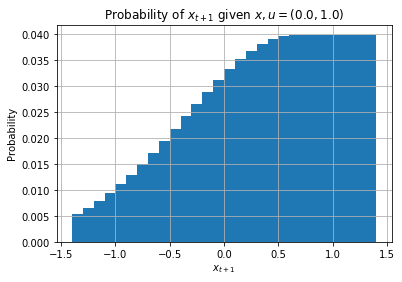

In [16]:
p_next_states = {}
for next_state in states:
    # Define interval of discrete state
    dx = [next_state - 0.05, next_state + 0.05]
    # Calculate probability of dx, given current x, u
    p_next_states[next_state] = next_state_probability(x, u, w, dx)
plt.bar(states, p_next_states.values())
plt.title("Probability of $x_{t+1}$ given $x,u=(%.1f,%.1f)$" % (x, u))
plt.xlabel("$x_{t+1}$")
plt.ylabel("Probability")
plt.grid()

In [17]:
sum(p_next_states.values())

0.4997565904326682

In [18]:
# Compute all state values recursively
print("  t     x")
for t in range(N-1, -1, -1):
    for x in states:
        print(f"{t:3d}, {x:.1f}")
        for u in actions:
            p_next_states = {}
            for next_state in states:
                # Define interval of discrete state
                dx = [next_state - 0.05, next_state + 0.05]
                # Calculate probability of dx, given current x, u
                p_next_states[next_state] = next_state_probability(x, u, w, dx)
            cost_to_go = sum(p_next_states.values())
            state_value_function[x] = terminal_state_values[x] + cost_to_go
    

  t     x
  9, -1.0
  9, -0.9
  9, -0.8
  9, -0.7
  9, -0.6
  9, -0.5
  9, -0.4
  9, -0.3
  9, -0.2
  9, -0.1
  9, 0.0
  9, 0.1
  9, 0.2
  9, 0.3
  9, 0.4
  9, 0.5
  9, 0.6
  9, 0.7
  9, 0.8
  9, 0.9
  9, 1.0
  8, -1.0
  8, -0.9
  8, -0.8
  8, -0.7
  8, -0.6
  8, -0.5
  8, -0.4
  8, -0.3
  8, -0.2
  8, -0.1
  8, 0.0
  8, 0.1
  8, 0.2
  8, 0.3
  8, 0.4
  8, 0.5
  8, 0.6
  8, 0.7
  8, 0.8
  8, 0.9
  8, 1.0
  7, -1.0
  7, -0.9
  7, -0.8
  7, -0.7
  7, -0.6
  7, -0.5
  7, -0.4
  7, -0.3
  7, -0.2
  7, -0.1
  7, 0.0
  7, 0.1
  7, 0.2
  7, 0.3
  7, 0.4
  7, 0.5
  7, 0.6
  7, 0.7
  7, 0.8
  7, 0.9
  7, 1.0
  6, -1.0
  6, -0.9
  6, -0.8
  6, -0.7
  6, -0.6
  6, -0.5
  6, -0.4
  6, -0.3
  6, -0.2
  6, -0.1
  6, 0.0
  6, 0.1
  6, 0.2
  6, 0.3
  6, 0.4
  6, 0.5
  6, 0.6
  6, 0.7
  6, 0.8
  6, 0.9
  6, 1.0
  5, -1.0
  5, -0.9
  5, -0.8
  5, -0.7
  5, -0.6
  5, -0.5
  5, -0.4
  5, -0.3
  5, -0.2
  5, -0.1
  5, 0.0
  5, 0.1
  5, 0.2
  5, 0.3
  5, 0.4
  5, 0.5
  5, 0.6
  5, 0.7
  5, 0.8
  5, 0.9
  5,

In [19]:
state_value_function

{-1.0: 1.706281887248208,
 -0.9: 1.5138719380543681,
 -0.8: 1.3366876832104526,
 -0.7: 1.1748646561857299,
 -0.6: 1.0286246295844872,
 -0.5: 0.898269555209595,
 -0.4: 0.7841733116784322,
 -0.3: 0.6867714943118023,
 -0.2: 0.6065495508873103,
 -0.1: 0.5440296328486042,
 0.0: 0.4997565904326682,
 0.1: 0.47428358677053706,
 0.2: 0.46815783497471297,
 0.3: 0.4819069687822378,
 0.4: 0.5160265380891096,
 0.5: 0.5709690743338534,
 0.6: 0.6471350982455881,
 0.7: 0.7448663475708102,
 0.8: 0.8644413909219552,
 0.9: 1.0060736734753277,
 1.0: 1.1699119194774592}

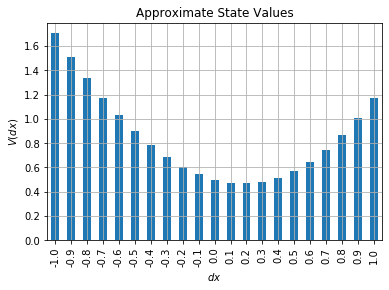

In [20]:
pd.Series(state_value_function).plot.bar()
plt.title("Approximate State Values")
plt.xlabel("$dx$")
plt.ylabel("$V(dx)$")
plt.grid()
plt.show()